In [1]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("../Data/worker_analysis/complete_worker.csv")
df.head()

,est_id,worker_id,est_type,cssr,service_provide_id,emp_status,start_cur_role_date,age,gender,disabled,...,people_cared_for,main_job,job_group,hrs_worked,calc_hr_rate,asc_qul_held,levelscqheld,trainflag,training,apprentice
0,7408,168676,6.0,406,8.0,Permanent,2007-09-17T00:00:00.000Z,39.0,Female,No,...,ut04flag,Senior Care Worker,Direct Care,40.0,7.50,Yes,Level 4,Yes,tr02flag,No
1,7408,168678,6.0,406,8.0,Permanent,2004-06-25T00:00:00.000Z,68.0,Female,No,...,ut04flag,Care Worker,Direct Care,40.0,5.75,Yes,Level 2,Yes,tr02flag,No
2,7408,168687,6.0,406,8.0,Permanent,2007-02-19T00:00:00.000Z,43.0,Female,No,...,ut04flag,Care Worker,Direct Care,0.0,7.50,Yes,Level 3,Yes,tr02flag,No
3,7408,168696,6.0,406,8.0,Permanent,2008-05-01T00:00:00.000Z,44.0,Female,No,...,ut04flag,Care Worker,Direct Care,40.0,7.50,Yes,Level 2,Yes,tr02flag,No
4,7408,168725,6.0,406,8.0,Permanent,2012-01-23T00:00:00.000Z,59.0,Female,No,...,ut04flag,Care Worker,Direct Care,0.0,7.50,No,No qual,Yes,tr02flag,No


In [36]:
df.shape

(65319, 30)

#### The data in the features we are using can be categorised into discreet and continuous. That is values, often selected form dropdowns or a list of values and values, such as distances, ages, pay rates etc. that can take on any value. 

#### We can easily count the number of unique values in each feature and plot these values out.

<AxesSubplot:title={'center':'Unique values per feature'}>

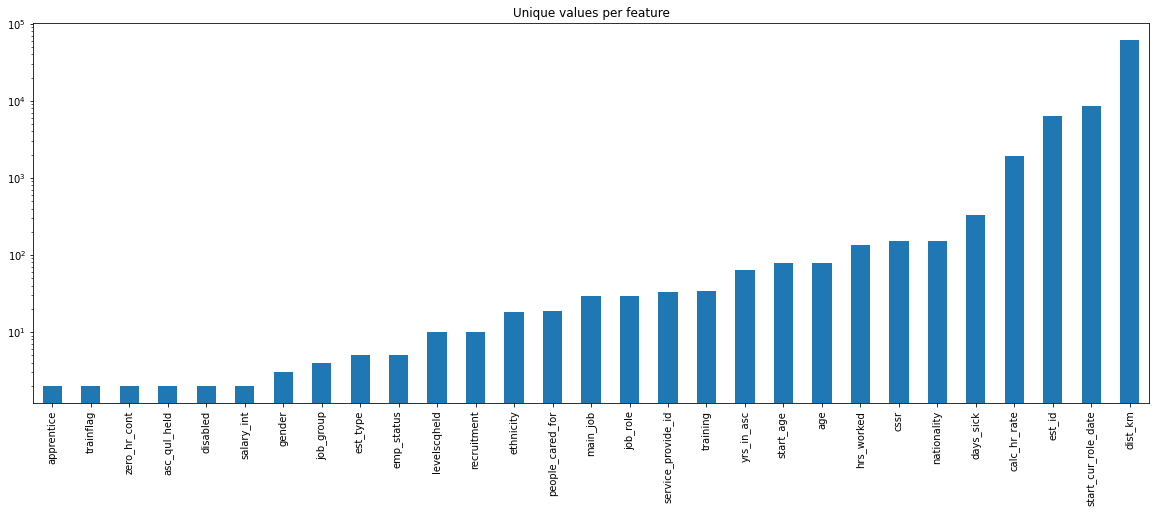

In [11]:
## We know that there will be a unique worker id for each row so we can ignore this. 

unique_values = df.drop(["worker_id"], axis=1).nunique().sort_values()

unique_values.plot.bar(
    logy=True,
    figsize=(20, 7),
    title="Unique values per feature"
)

In [9]:
unique_values

apprentice                 2
trainflag                  2
asc_qul_held               2
salary_int                 2
zero_hr_cont               2
disabled                   2
gender                     3
job_group                  4
est_type                   5
emp_status                 5
levelscqheld              10
recruitment               10
ethnicity                 18
people_cared_for          19
main_job                  29
job_role                  29
service_provide_id        33
training                  34
yrs_in_asc                63
start_age                 78
age                       78
hrs_worked               136
cssr                     150
nationality              152
days_sick                332
calc_hr_rate            1920
start_cur_role_date     8458
dist_km                61618
dtype: int64

#### Lets isolate the continuous values and inspect these more closely.

In [13]:
df_continu = df[["worker_id", "age", "yrs_in_asc", "start_age", "hrs_worked", "days_sick", "calc_hr_rate", "start_cur_role_date", "dist_km"]]

## Age

<AxesSubplot:title={'center':'Age'}>

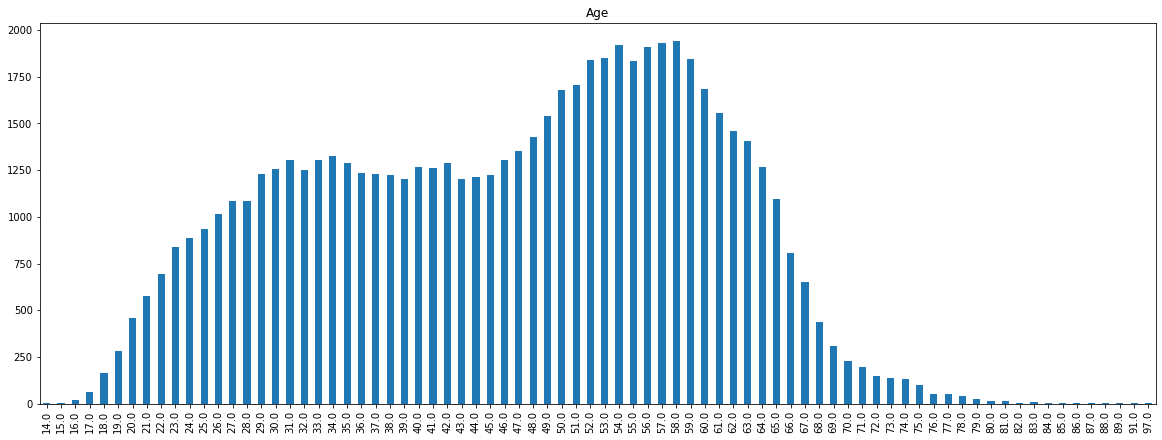

In [14]:
uv_age = df_continu["age"].value_counts().sort_index()


uv_age.plot.bar(
    figsize=(20, 7),
    title="Age"
)

## Years in Adult Social Care

<AxesSubplot:title={'center':'Years in Adult social care'}>

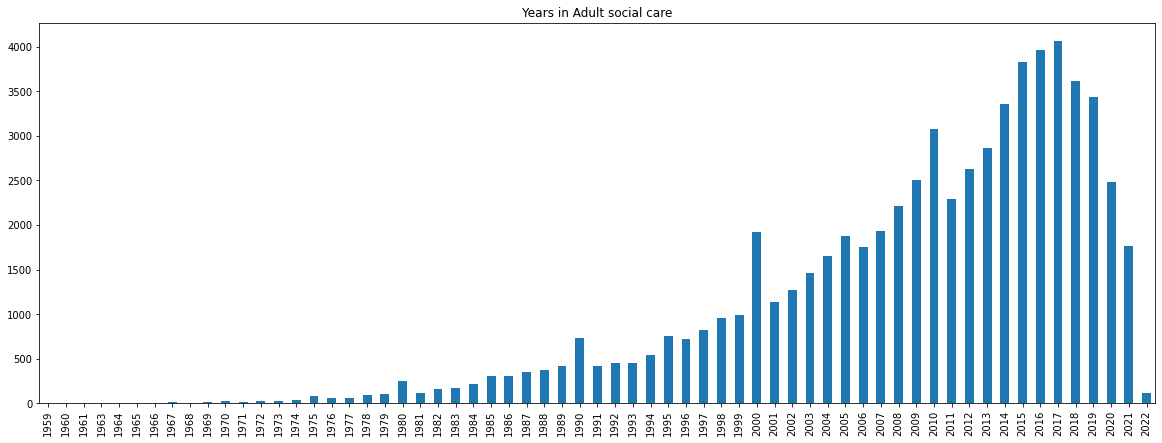

In [15]:
uv_start_year = df_continu["yrs_in_asc"].value_counts().sort_index()

uv_start_year.plot.bar(
    figsize=(20, 7),
    title="Years in Adult social care"
)

## Starting Age

<AxesSubplot:title={'center':'Start age'}>

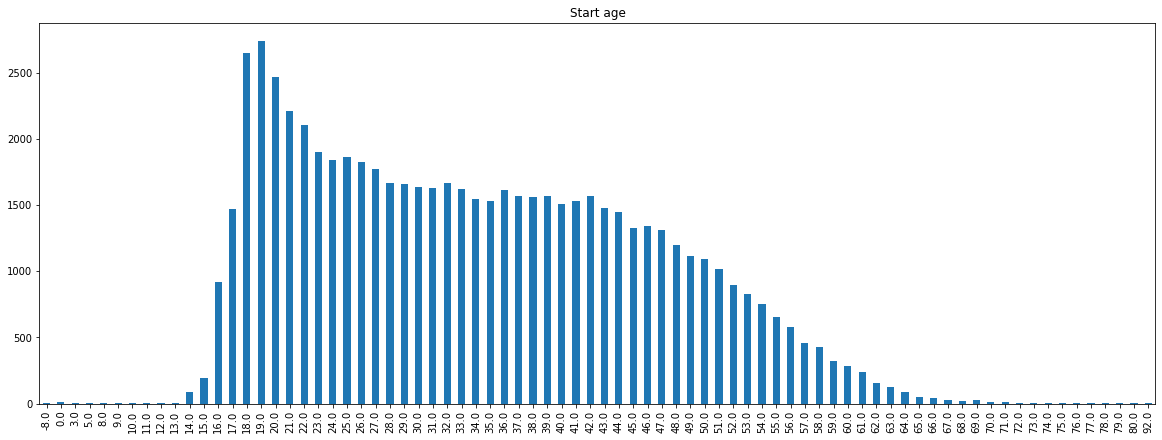

In [16]:
uv_start_age = df_continu["start_age"].value_counts().sort_index()

uv_start_age.plot.bar(
    figsize=(20, 7),
    title="Start age"
)

## Hours worked

<AxesSubplot:title={'center':'Hours worked'}, ylabel='Frequency'>

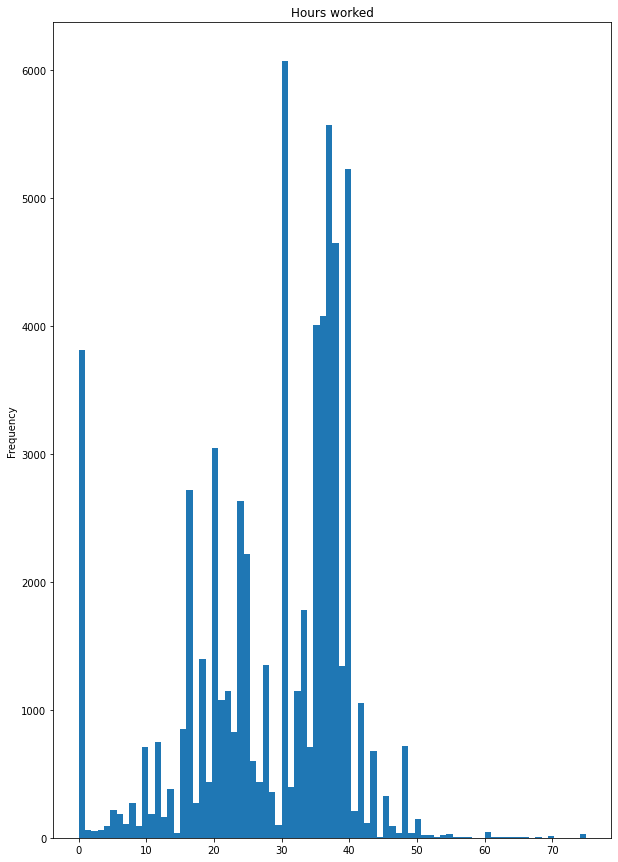

In [26]:
df_continu["hrs_worked"].plot.hist(
    bins=80,
    figsize=(10, 15),
    title="Hours worked"
)

In [35]:
df[df["hrs_worked"]==0].shape

(3814, 30)

## Days Sick

array([<AxesSubplot:>], dtype=object)

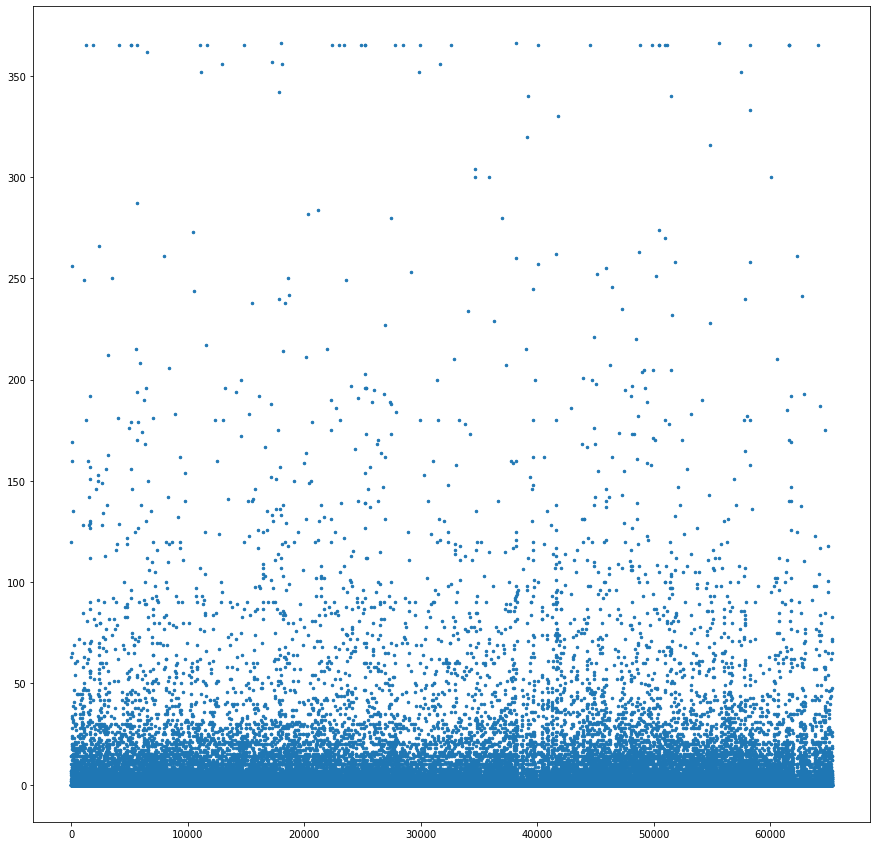

In [47]:
df_continu["days_sick"].plot(
    lw=0, 
    marker=".", 
    ms=5,
    subplots=True, 
    figsize=(15, 15), 
)

## Calculated hourly rate

array([<AxesSubplot:>], dtype=object)

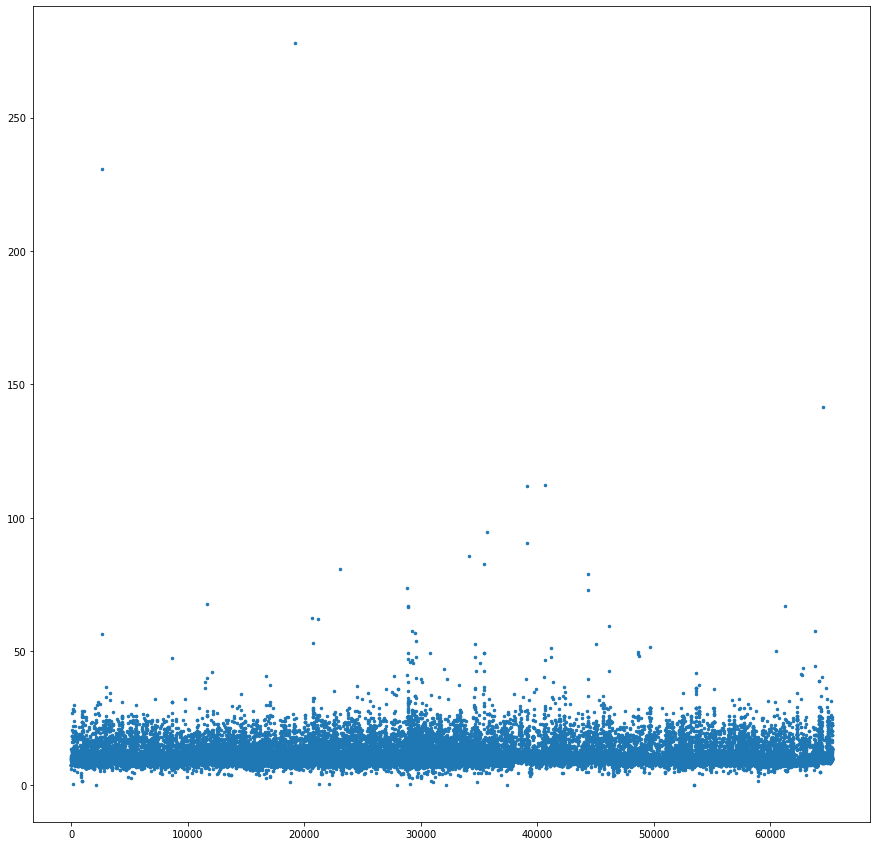

In [48]:
df_continu["calc_hr_rate"].plot(
    lw=0, 
    marker=".", 
    ms=5,
    subplots=True, 
    figsize=(15, 15), 
)

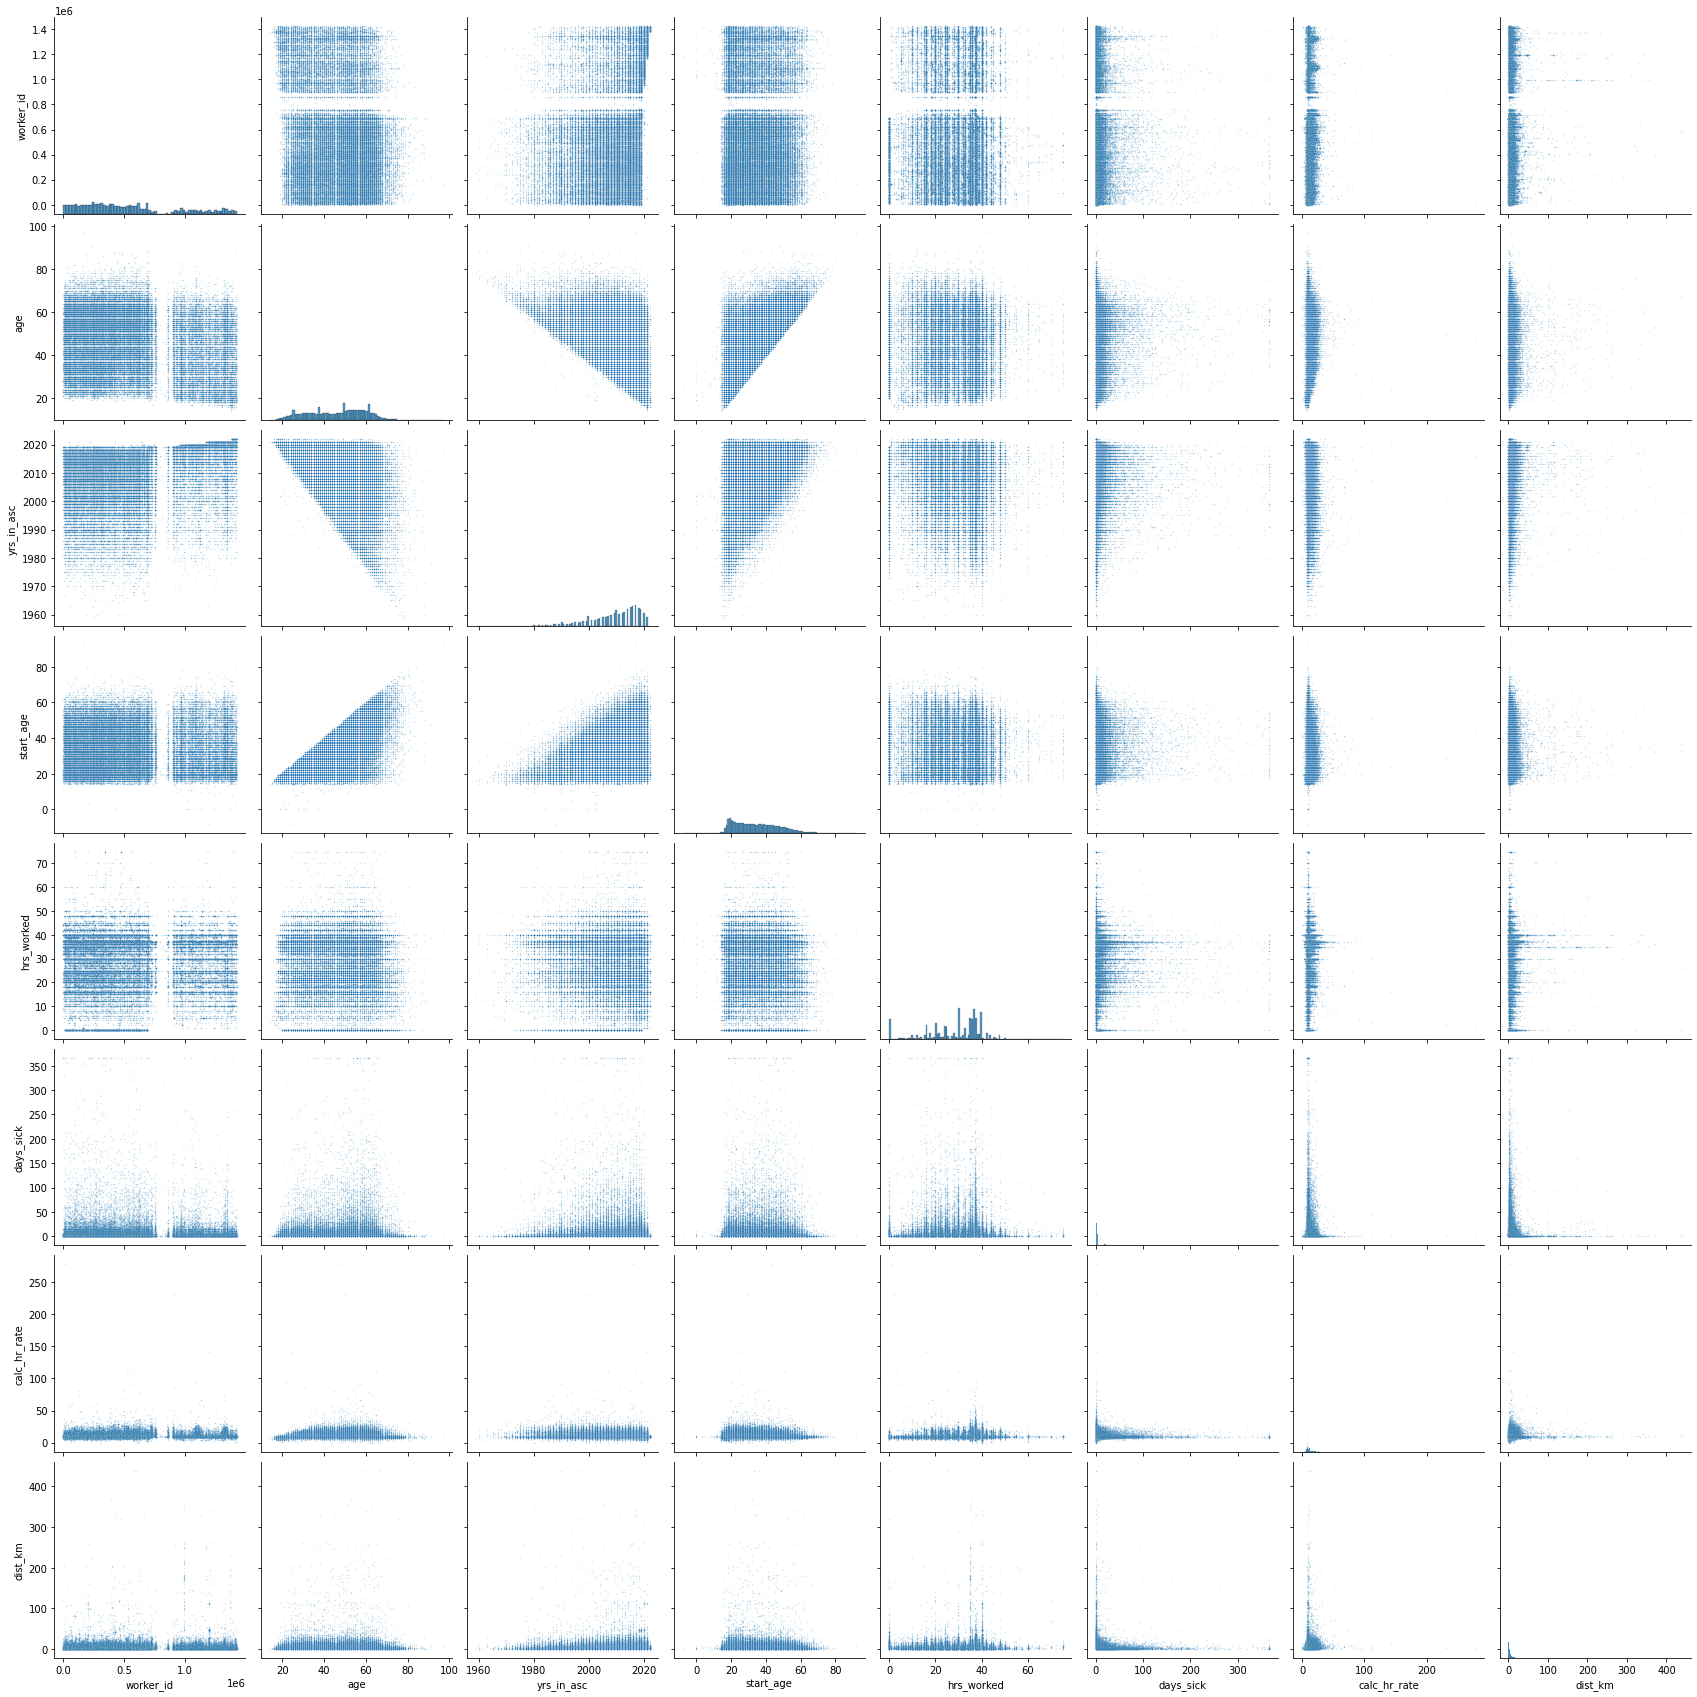

In [50]:
import seaborn as sns

sns.pairplot(
    df_continu, 
    height=3, 
    plot_kws={"s": 2, "alpha": 0.2}
)

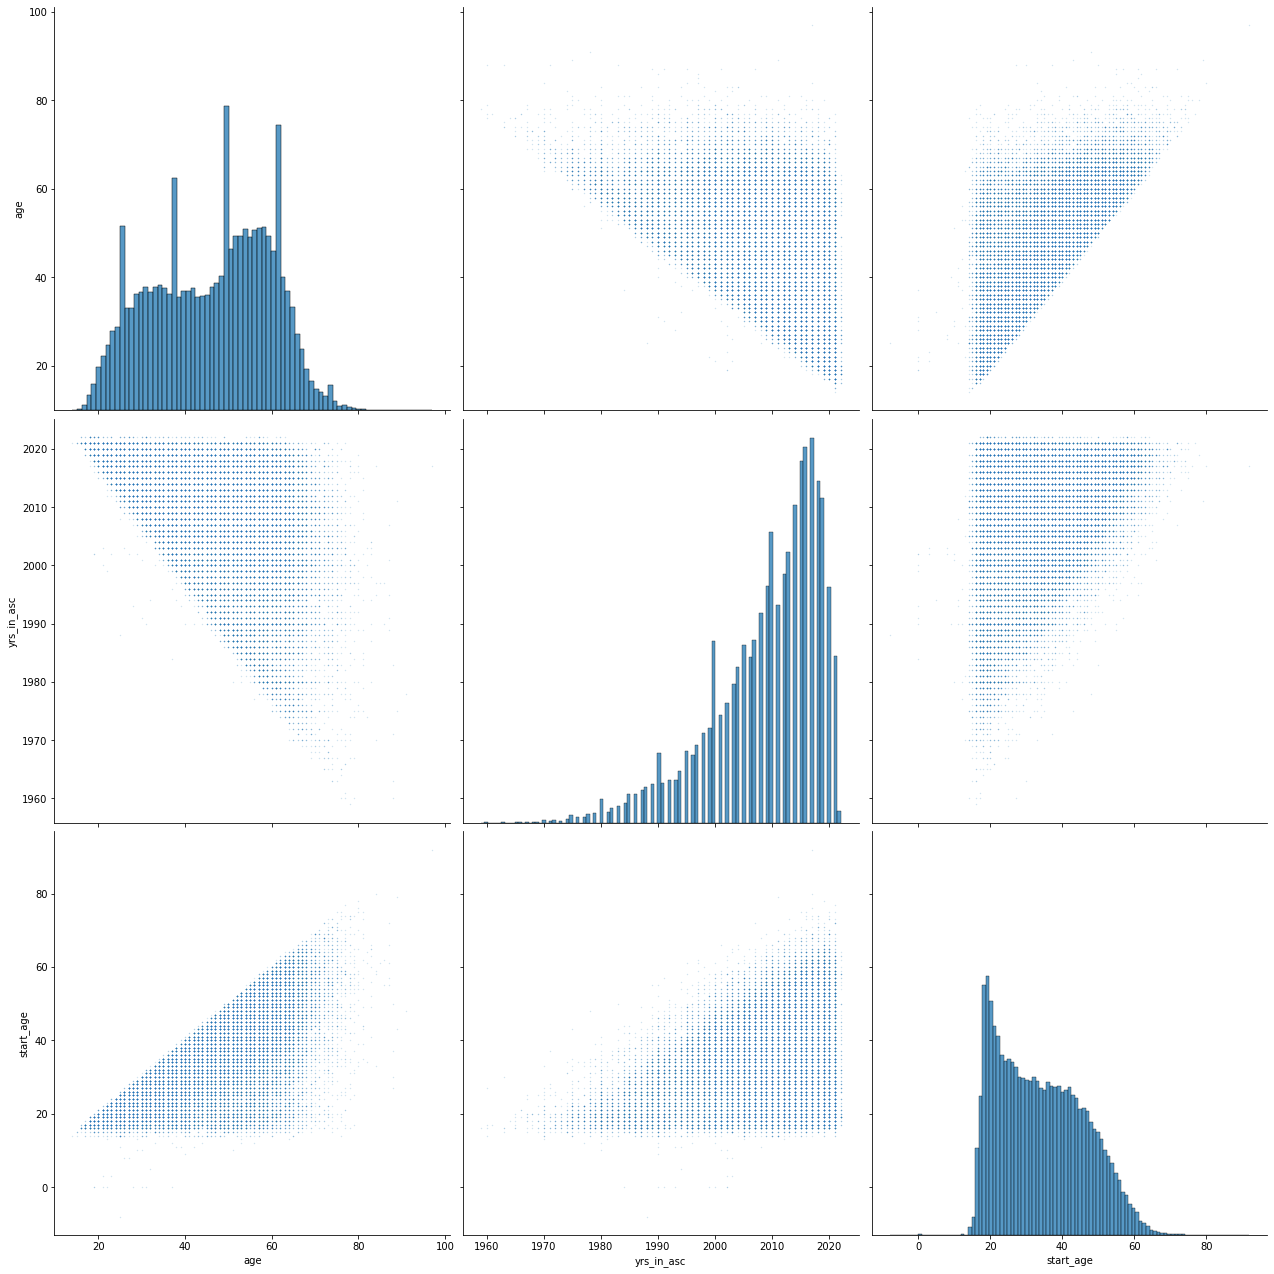

In [52]:
sns.pairplot(
    df_continu[["age", "yrs_in_asc", "start_age"]], 
    height=6, 
    plot_kws={"s": 2, "alpha": 0.2}
)